In [ ]:
#Basic and most important libraries

import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly
#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")



In [ ]:
#step: represents a unit of time where 1 step equals 1 hour
#type: type of online transaction
#amount: the amount of the transaction
#nameOrig: customer starting the transaction
#oldbalanceOrg: balance before the transaction
#newbalanceOrig: balance after the transaction
#nameDest: recipient of the transaction
#oldbalanceDest: initial balance of recipient before the transaction
#newbalanceDest: the new balance of recipient after the transaction
#isFraud: fraud transaction

In [ ]:
#Importing the Fraud csv file for and analyzing and training.
df=pd.read_csv("Fraud.csv")

In [ ]:
# Checking the first 10 rows and analyzing the columns about the transactions.
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
#The shape of dataset is 63 lakh rows and 11 columns.
df.shape

(6362620, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Here it is about the information about the columns.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# The dependent variable i.e isfraud has 63 lakh non fraud transactions and 8 thousand are fraudulant transactions.
# here analyse the distribution of two classes
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
# here 0---> represents legit transactions
# here 1---> represents fraudulent transcations

In [ ]:
#here its shows percentage value
df.isFraud.value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

<Axes: >

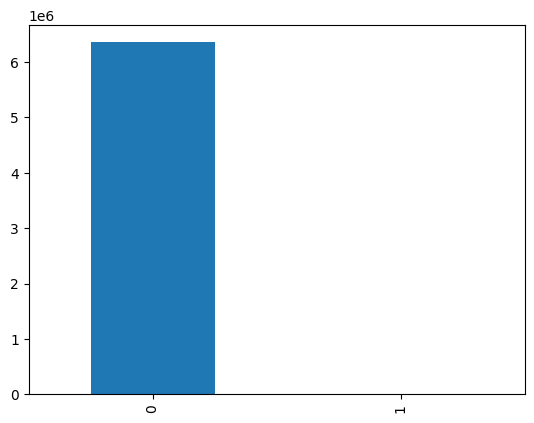

In [ ]:
df.isFraud.value_counts().plot(kind="bar")

In [ ]:
# here to find all the information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
 # to know the description of the dataset.---> it is five number summary.
# Here we can see the mean, standard deviation of variables.
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# here to find what type of data columns in dataset.
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
# to check/find the how many missing values are  in the dataset.
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# to display the all the columns/attributes/features in the dataset.
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# visualization part

In [ ]:
print("It is about the type of transaction is made by customer, there are 5 types namely: cash_out, payment, cash_in, transfer adn debit transactions are made. There is about 35.2% of cash_out transaction is made")

type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

It is about the type of transaction is made by customer, there are 5 types namely: cash_out, payment, cash_in, transfer adn debit transactions are made. There is about 35.2% of cash_out transaction is made


<Axes: xlabel='type', ylabel='count'>

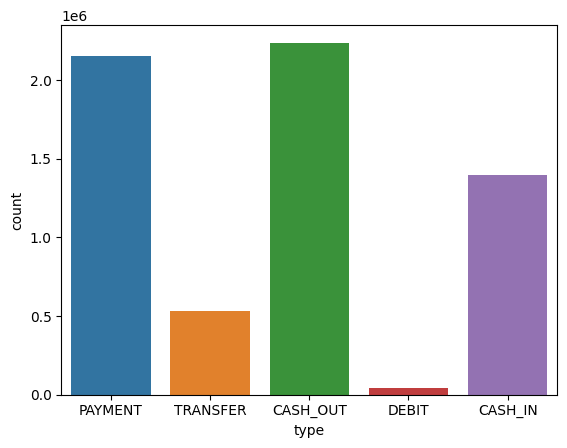

In [ ]:
#type of transaction in the form bar chart the payment and cash_out transaction is happened more.
sns.countplot(data=df,x='type')

While making the transaction we are checking whether there is any fraudulant transaction is made. However, there is no much fraudulant transaction is made


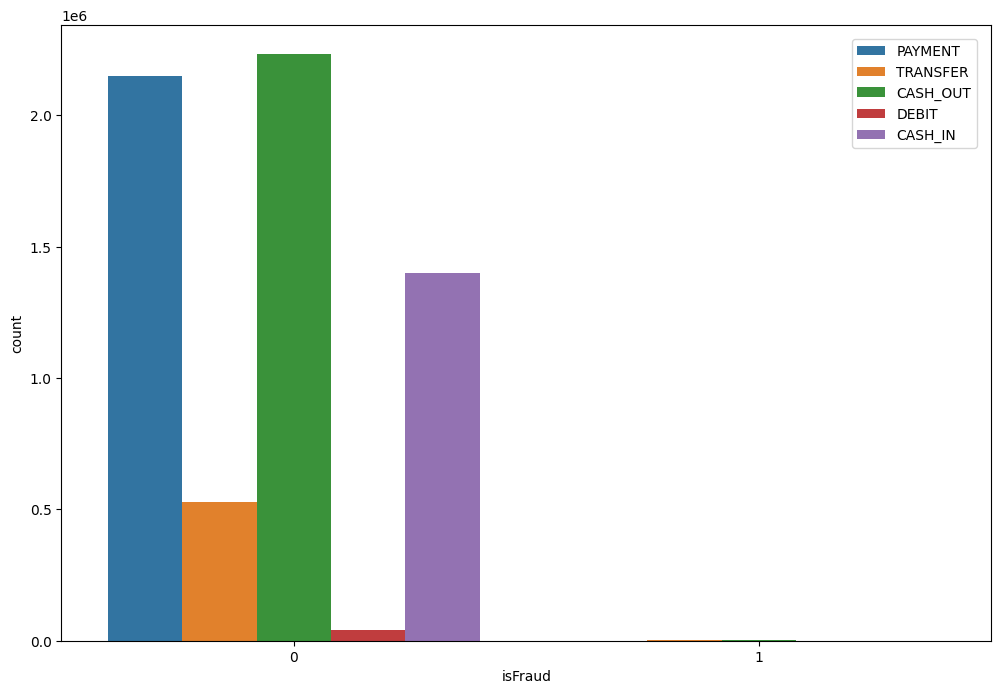

In [ ]:
print("While making the transaction we are checking whether there is any fraudulant transaction is made. However, there is no much fraudulant transaction is made")
plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=df,hue='type')
plt.legend(loc=[0.85,0.8])


In [ ]:
type = df["isFraud"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="No.Of Fraud Occured")
figure.show()


checking each type transaction whether there is any fraudulant transaction is made, but only in transfer and cash_out transaction has fraudulant transaction were made.


Text(0, 0.5, 'isFraud')

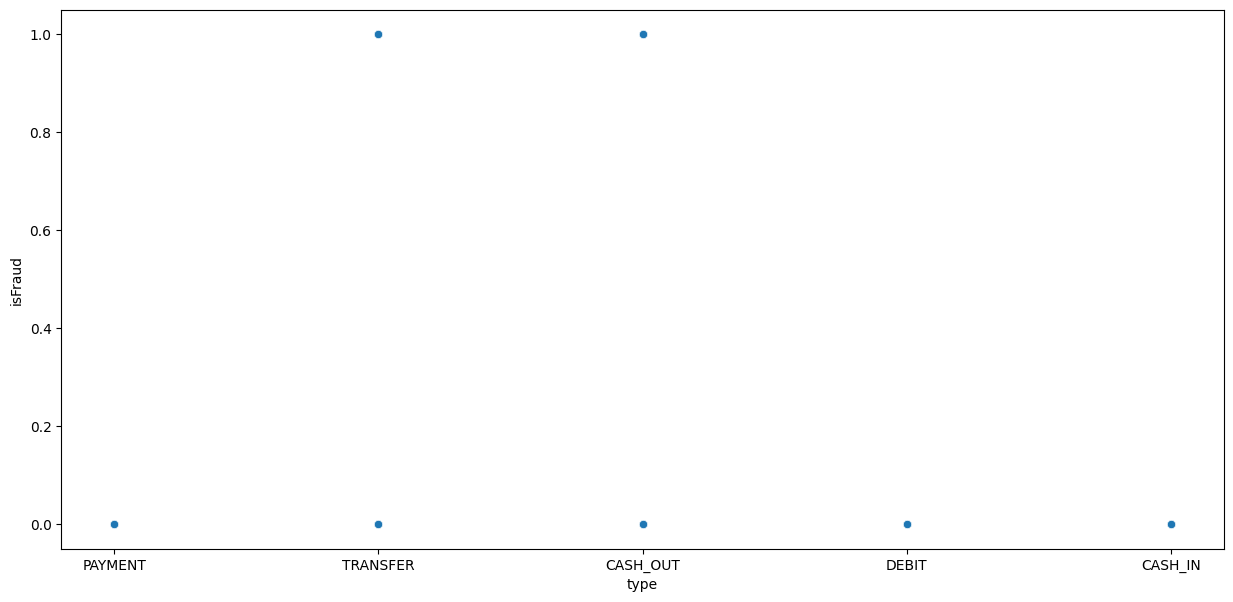

In [ ]:
print("checking each type transaction whether there is any fraudulant transaction is made, but only in transfer and cash_out transaction has fraudulant transaction were made.")
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["type"], y = df["isFraud"])
plt.xlabel('type')
plt.ylabel('isFraud')

# Converting categorical data into numerical data.

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
df['type']=la.fit_transform(df['type'])

In [ ]:

df['type'].value_counts()

1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


In [ ]:

df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Droppig the columns which is not required

In [ ]:
df.drop(['nameOrig',"nameDest"],axis=1,inplace=True)

# Removing the outliers

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

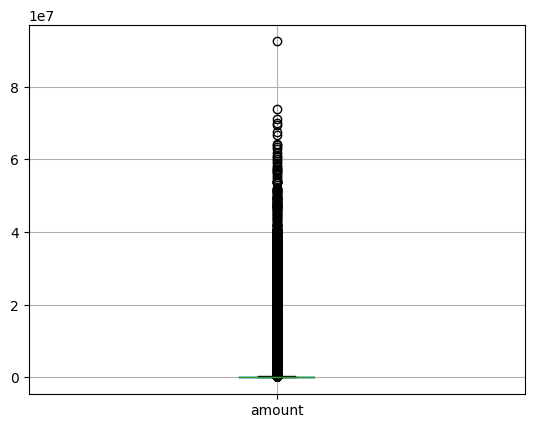

In [ ]:
#checking outliers
df.boxplot(column=["amount"])
plt.show()

In [ ]:
lowFraud,uppFraud=remove_outlier(df['amount'])
df["amount"]=np.where(df['amount']>uppFraud,uppFraud,df['amount'])
df["amount"]=np.where(df['amount']<lowFraud,lowFraud,df['amount'])

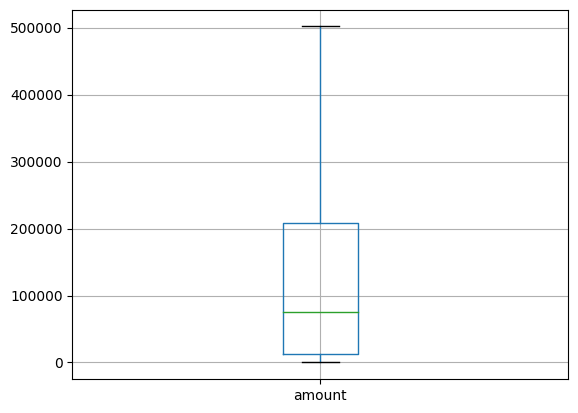

In [ ]:
#after removing the outliers
df.boxplot(column=["amount"])
plt.show()


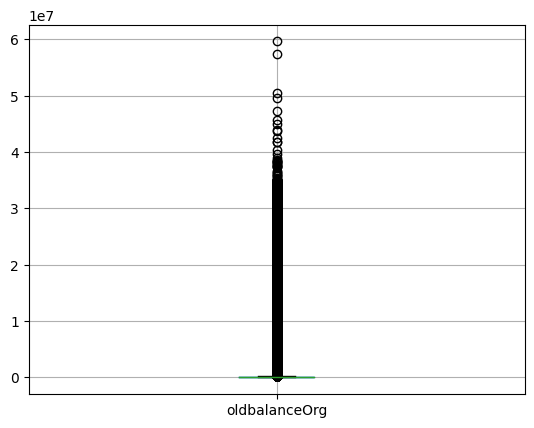

In [ ]:
#checking outkiers
df.boxplot(column=["oldbalanceOrg"])
plt.show()

In [ ]:
lowFraud,uppFraud=remove_outlier(df['oldbalanceOrg'])
df["oldbalanceOrg"]=np.where(df['oldbalanceOrg']>uppFraud,uppFraud,df['oldbalanceOrg'])
df["oldbalanceOrg"]=np.where(df['oldbalanceOrg']<lowFraud,lowFraud,df['oldbalanceOrg'])

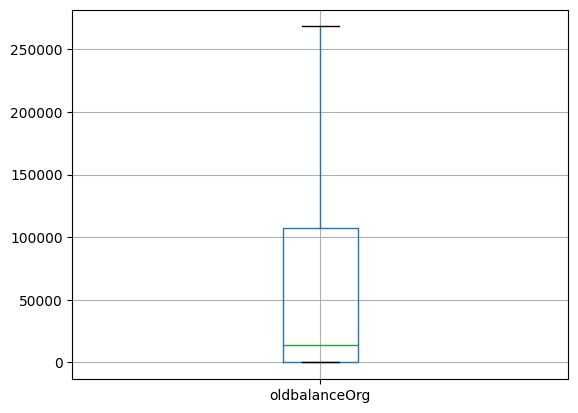

In [ ]:
#after removing the outliers
df.boxplot(column=["oldbalanceOrg"])
plt.show()


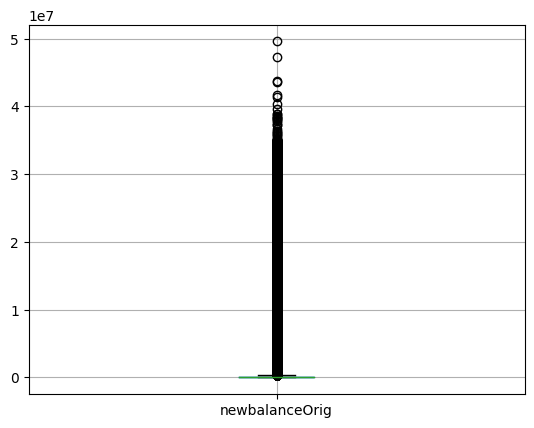

In [ ]:
#checking the outlier
df.boxplot(column=["newbalanceOrig"])
plt.show()

In [ ]:
lowFraud,uppFraud=remove_outlier(df['newbalanceOrig'])
df["newbalanceOrig"]=np.where(df['newbalanceOrig']>uppFraud,uppFraud,df['newbalanceOrig'])
df["newbalanceOrig"]=np.where(df['newbalanceOrig']<lowFraud,lowFraud,df['newbalanceOrig'])

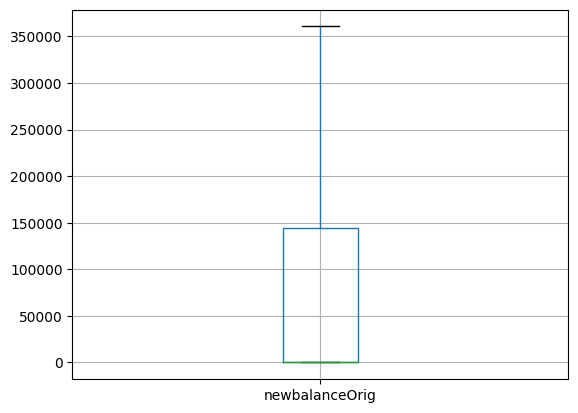

In [ ]:
#after removing the outlier
df.boxplot(column=["newbalanceOrig"])
plt.show()


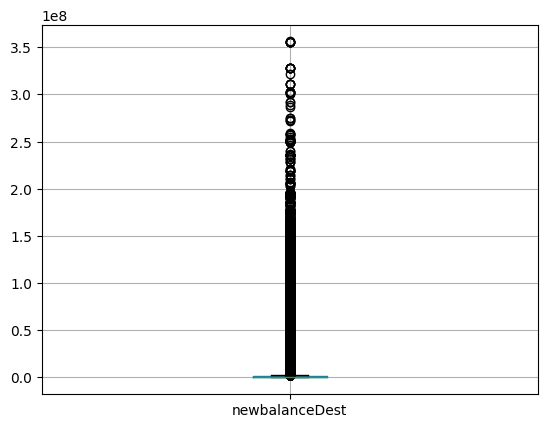

In [ ]:
#checking the outlier
df.boxplot(column=["newbalanceDest"])
plt.show()

In [ ]:
lowFraud,uppFraud=remove_outlier(df['newbalanceDest'])
df["newbalanceDest"]=np.where(df['newbalanceDest']>uppFraud,uppFraud,df['newbalanceDest'])
df["newbalanceDest"]=np.where(df['newbalanceDest']<lowFraud,lowFraud,df['newbalanceDest'])

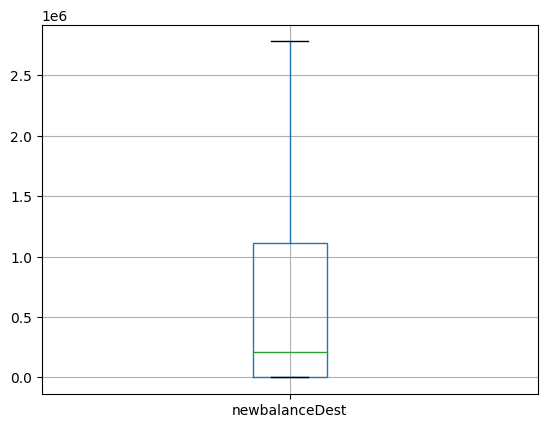

In [ ]:
#after removing the outlier
df.boxplot(column=["newbalanceDest"])
plt.show()

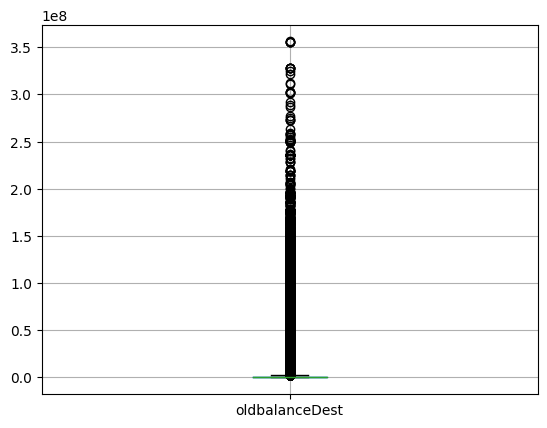

In [ ]:
#checking the outlier
df.boxplot(column=["oldbalanceDest"])
plt.show()

In [ ]:
lowFraud,uppFraud=remove_outlier(df['oldbalanceDest'])
df["oldbalanceDest"]=np.where(df['oldbalanceDest']>uppFraud,uppFraud,df['oldbalanceDest'])
df["oldbalanceDest"]=np.where(df['oldbalanceDest']<lowFraud,lowFraud,df['oldbalanceDest'])

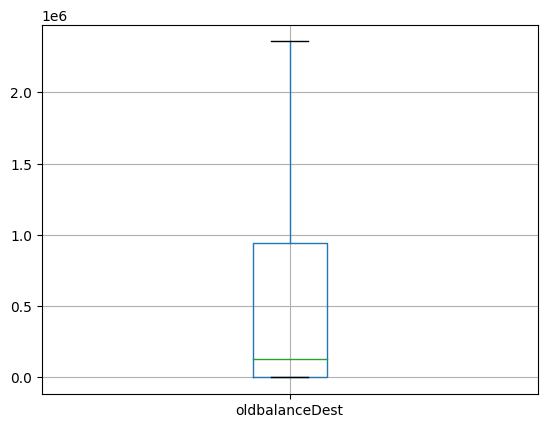

In [ ]:
#after checking the outlier
df.boxplot(column=["oldbalanceDest"])
plt.show()

In [ ]:
#here to find all the information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


# Logistic regression

In [ ]:
x=df.drop(['isFraud'],axis=1)
y=df[['isFraud']]

In [ ]:
# We have splitted the data for traning and validation. 70% for training and 30% for validation.
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=1)

In [ ]:
# Here i have applied logistic regresssion
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
reg.score(x_train,y_train)

0.9976768330386808

In [ ]:
reg.score(x_test,y_test)

0.9976885832146716

In [ ]:
# Here i have evaluating the model performance with the confusion matrics, precision, recall and F1 score.
from sklearn import  metrics

In [ ]:
predictions=reg.predict(x_test)

In [ ]:
# Here im evaluating the model with the metrics
# Precision : TP/TP+FP for Positive Class - 1
#             TN/TN+FN for Negative class - 0
#             0 - Non fraud - 1904251/1904251+2345 = 1
#             1 - Fraud     - 123/123+2067 = 0.06

# Recall : TP/TP+FN for positive class - 1
#          TN/TN+FN for negative class - 0
#          0 - Non fraud - 1904251/1904251+2097 = 1
#          1 - Fraud - 123/123-2345 = 0.05

# F1- Score : 2*precision*recall/Precision+recall
#            0 - Non fraud  - 2*1*1/1+1 = 1
#            1 - Fraud   - 2*0.06*0.05/0.06+0.05 = 0.05
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.06      0.05      0.05      2468

    accuracy                           1.00   1908786
   macro avg       0.53      0.52      0.53   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
df.shape

(6362620, 9)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[1904251,    2067],
       [   2345,     123]])

<Axes: >

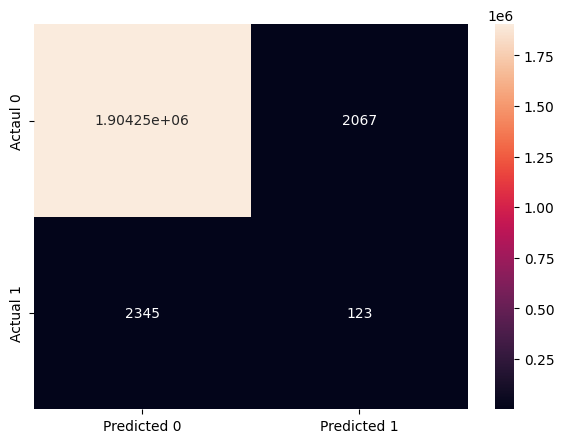

In [ ]:
# The confusion matrix says about the How many predictions and true and false.
# 1904251 are the values which is true prediction of Non fraud transactions i.e TN
# 2067 are the values which the model predicted Fraud transaction but actually it is Non fraud transaction i.e FP
# 2345 are the values which the model predicts Non fraud but actually it is Fraud transaction i.e FN
# 123 are the values which the model predicts Fraud transaction and actually it is Fraud transaction only i.e TP

cm=metrics.confusion_matrix(y_test, predictions, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actaul 0","Actual 1"]],
                  columns = [i for i in ["Predicted 0","Predicted 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')




# DecisionTree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
a = DecisionTreeClassifier()

In [ ]:
a.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
a.score(x_train,y_train)

0.9999939378072914

In [ ]:
a.score(x_test,y_test)

0.999592411092705

# XgBoost Model

In [ ]:
from xgboost import XGBClassifier

In [ ]:
d = XGBClassifier(n_estimators=20,max_depth=3)

In [ ]:
d.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
d.score(x_train,y_train)


0.9994016391270981

In [ ]:
d.score(x_test,y_test)

0.9994137635125153

# Sampling

# RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Random under sampler which balance the data by equally distributing the minority data to both 2 class.
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', (y).value_counts())
print('Resample dataset shape', (y_rus).value_counts())

original dataset shape: isFraud
0          6354407
1             8213
dtype: int64
Resample dataset shape isFraud
0          8213
1          8213
dtype: int64


In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



# NearMiss

In [ ]:
#The algorithm first calculates the distance between all the points in the larger class with the points in the smaller class.
#This can make the process of undersampling easier.

from imblearn.under_sampling import NearMiss
print('Original dataset shape %s',(y).value_counts())
nm = NearMiss()
x_res, y_res = nm.fit_resample(x, y)
print('Resampled dataset shape %s',(y_res).value_counts())

Original dataset shape %s isFraud
0          6354407
1             8213
dtype: int64
Resampled dataset shape %s isFraud
0          8213
1          8213
dtype: int64


In [ ]:
a=LogisticRegression()

In [ ]:
a.fit(x_train,y_train)

LogisticRegression()

In [ ]:
a.score(x_train,y_train)

0.9976768330386808

In [ ]:
a.score(x_test,y_test)

0.9976885832146716

In [ ]:
b = DecisionTreeClassifier()

In [ ]:
b.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
b.score(x_train,y_train)

0.9999939378072914

In [ ]:
b.score(x_test,y_test)

0.9995908394131139

In [ ]:
# down sampling
#eq wid 0
# Here we will give Values manually for to balance the data.
#To keep original data as it is to use the same for later.
new_df=df.copy()
#Getting seperated data with 1 and 0 status.
df_majority=new_df[new_df.isFraud==0]
df_minority=new_df[new_df.isFraud==1]


df_majority_downsampled=resample(df_majority,replace=False,n_samples=8213,random_state=1)
df_downsampled=pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.isFraud.value_counts())


Downsampled data:->
 0    8213
1    8213
Name: isFraud, dtype: int64


In [ ]:
a=LogisticRegression()

In [ ]:
a.fit(x_train,y_train)

LogisticRegression()

In [ ]:
a.score(x_train,y_train)

0.9976768330386808

In [ ]:
a.score(x_test,y_test)

0.9976885832146716

In [ ]:
b = DecisionTreeClassifier()

In [ ]:
b.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
b.score(x_train,y_train)


0.9999939378072914

In [ ]:
b.score(x_test,y_test)

0.999592411092705

In [ ]:
#upsampling
#eq wid 1
#Here we are upsampling the minority class data points.
#i.e., we will get equal amount of data points as majority class from minority class
df_minority_upsampled=resample(df_minority,replace=True,n_samples=6354407,random_state=1)
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df_upsampled.isFraud.value_counts())




Upsampled data:->
 0    6354407
1    6354407
Name: isFraud, dtype: int64


In [ ]:
a=LogisticRegression()

In [ ]:
a.fit(x_train,y_train)

LogisticRegression()

In [ ]:
a.score(x_train,y_train)

0.9976768330386808

In [ ]:
a.score(x_test,y_test)

0.9976885832146716

In [ ]:
b = DecisionTreeClassifier()

In [ ]:
b.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
b.score(x_train,y_train)

0.9999939378072914

In [ ]:
b.score(x_test,y_test)

0.9995840288015524

In [ ]:
df.head(50)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0000,160296.360,0.0,0.000,0,0
1,1,3,1864.28,21249.0000,19384.720,0.0,0.000,0,0
2,1,4,181.00,181.0000,0.000,0.0,0.000,1,0
3,1,1,181.00,181.0000,0.000,21182.0,0.000,1,0
4,1,3,11668.14,41554.0000,29885.860,0.0,0.000,0,0
5,1,3,7817.71,53860.0000,46042.290,0.0,0.000,0,0
6,1,3,7107.77,183195.0000,176087.230,0.0,0.000,0,0
7,1,3,7861.64,176087.2300,168225.590,0.0,0.000,0,0
8,1,3,4024.36,2671.0000,0.000,0.0,0.000,0,0
9,1,2,5337.77,41720.0000,36382.230,41898.0,40348.790,0,0


In [ ]:
input_data = (1,4,181.00,181.0,0.00,0.0,0.0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('not fraud')
else:
  print('fraud')

[0]
not fraud
